In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# Path to your file (if using Colab, you'll have to upload it manually)
data = pd.read_csv(r"C:\Users\bhadr\OneDrive\Desktop\Traffic_Collision_Data_from_2010_to_Present.csv")

# Preview data
data.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [19]:
# Structure of dataset
data.info()

# Summary statistics
data.describe(include='all')

# Check null values
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621677 entries, 0 to 621676
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               621677 non-null  int64  
 1   Date Reported           621677 non-null  object 
 2   Date Occurred           621677 non-null  object 
 3   Time Occurred           621677 non-null  int64  
 4   Area ID                 621677 non-null  int64  
 5   Area Name               621677 non-null  object 
 6   Reporting District      621677 non-null  int64  
 7   Crime Code              621677 non-null  int64  
 8   Crime Code Description  621677 non-null  object 
 9   MO Codes                534353 non-null  object 
 10  Victim Age              533483 non-null  float64
 11  Victim Sex              610980 non-null  object 
 12  Victim Descent          610029 non-null  object 
 13  Premise Code            620718 non-null  float64
 14  Premise Description 

DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87324
Victim Age                88194
Victim Sex                10697
Victim Descent            11648
Premise Code                959
Premise Description         960
Address                       0
Cross Street              29460
Location                      0
dtype: int64

In [21]:
data.drop(['DR Number', 'MO Codes'], axis=1, inplace=True)


In [25]:
data['Victim Sex'] = data['Victim Sex'].fillna("Unknown")
data['Victim Descent'] = data['Victim Descent'].fillna("Unknown")
data['Victim Age'] = data['Victim Age'].fillna(data['Victim Age'].median())



In [27]:
data['Date Reported'] = pd.to_datetime(data['Date Reported'], errors='coerce')
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'], errors='coerce')

# Optional: extract year, month, hour etc.
data['Year'] = data['Date Occurred'].dt.year
data['Month'] = data['Date Occurred'].dt.month


In [29]:
# Example: "(34.0571, -118.2475)" → separate lat/lon
data[['Latitude', 'Longitude']] = data['Location'].str.strip('()').str.split(',', expand=True).astype(float)


In [31]:
data.drop_duplicates(inplace=True)


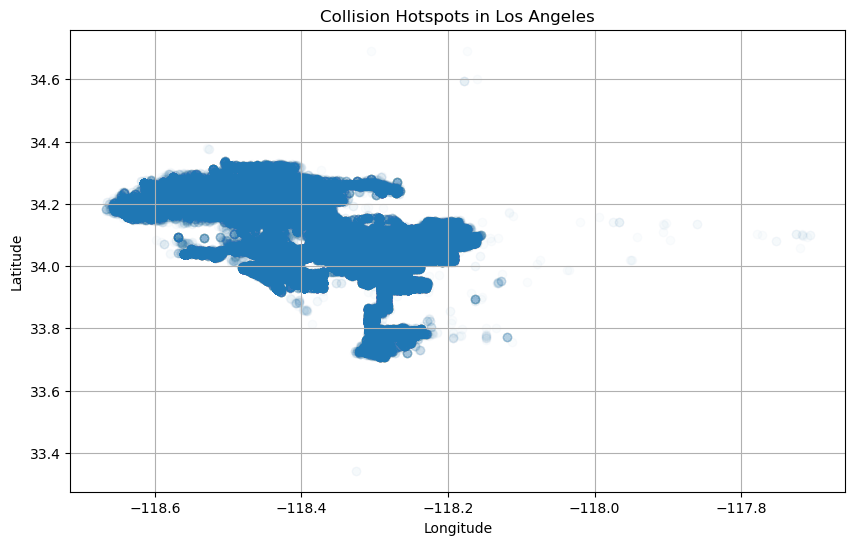

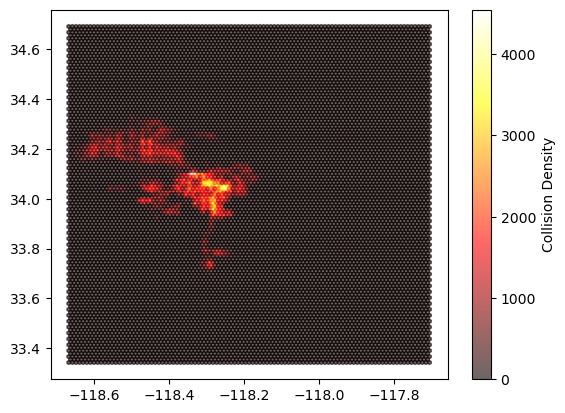

In [73]:
# Remove invalid coordinate values

# 4. Analysis Objective 1: Identify High-Risk Areas (Hotspots)
cleaned_data = data[(data['Longitude'] < -117) & 
                    (data['Longitude'] > -119) & 
                    (data['Latitude'] > 33) & 
                    (data['Latitude'] < 35)]

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'], alpha=0.02)
plt.title("Collision Hotspots in Los Angeles")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.savefig("scatter_hotspots.png")
plt.show()
plt.hexbin(cleaned_data['Longitude'], cleaned_data['Latitude'], gridsize=100, cmap='hot', alpha=0.6)
plt.colorbar(label='Collision Density')


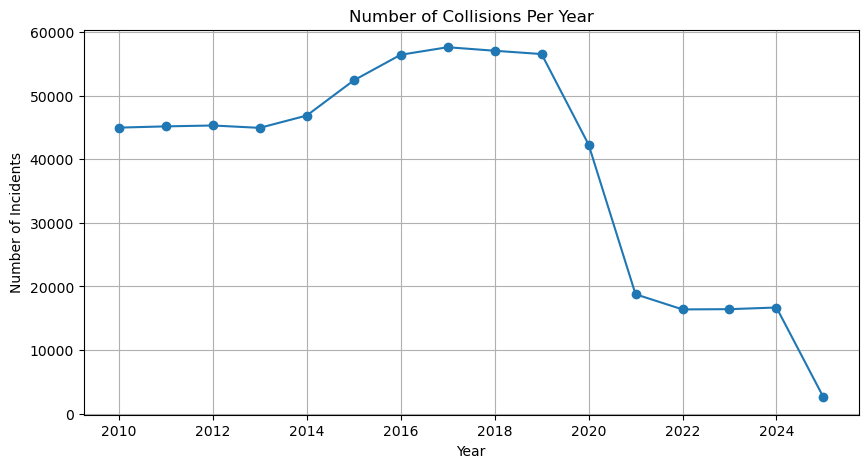

In [47]:
# 5. Analysis Objective 2: Trends Over the Years
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'], errors='coerce')
data['Year'] = data['Date Occurred'].dt.year
yearly_data = data['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index, yearly_data.values, marker='o')
plt.title("Number of Collisions Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.savefig("yearly_trend.png")
plt.show()



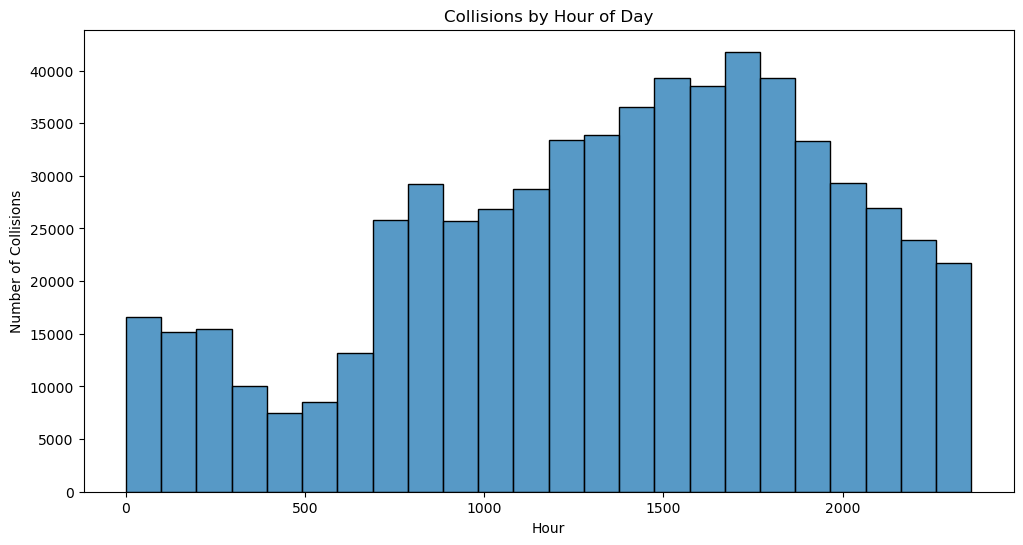

In [49]:
# 6. Objective 3: Road Safety Measures (Time of day analysis)
plt.figure(figsize=(12, 6))
sns.histplot(data['Time Occurred'], bins=24, kde=False)
plt.title("Collisions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Collisions")
plt.savefig("hourly_distribution.png")
plt.show()

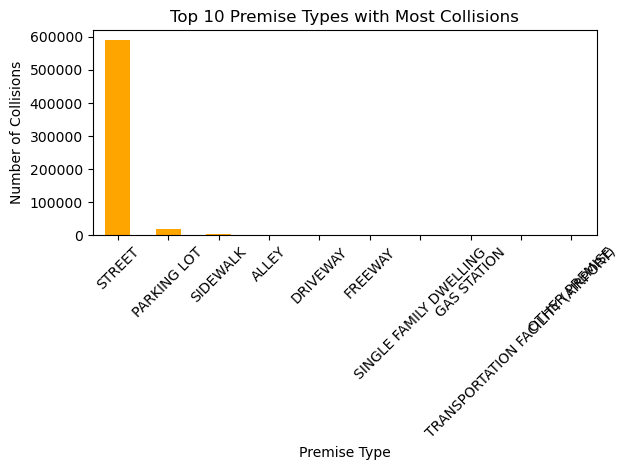

In [51]:
# 7. Objective 4: Policy Evaluation (Premise Code/Area based)
premise_counts = data['Premise Description'].value_counts().head(10)
premise_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Premise Types with Most Collisions")
plt.xlabel("Premise Type")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_premises.png")
plt.show()

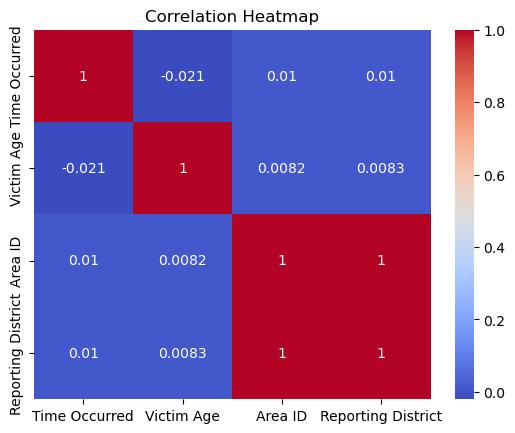

In [53]:
# 8. Objective 5: Predictive Analysis Prep - Correlation
# Prepare numerical subset for correlation
numerics = data[['Time Occurred', 'Victim Age', 'Area ID', 'Reporting District']]
sns.heatmap(numerics.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

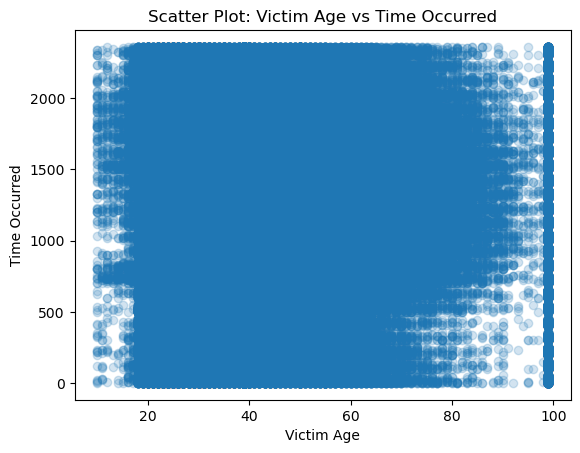

In [58]:
# 10. Scatter Plot
plt.scatter(data['Victim Age'], data['Time Occurred'], alpha=0.2)
plt.xlabel("Victim Age")
plt.ylabel("Time Occurred")
plt.title("Scatter Plot: Victim Age vs Time Occurred")
plt.savefig("scatter_age_time.png")
plt.show()

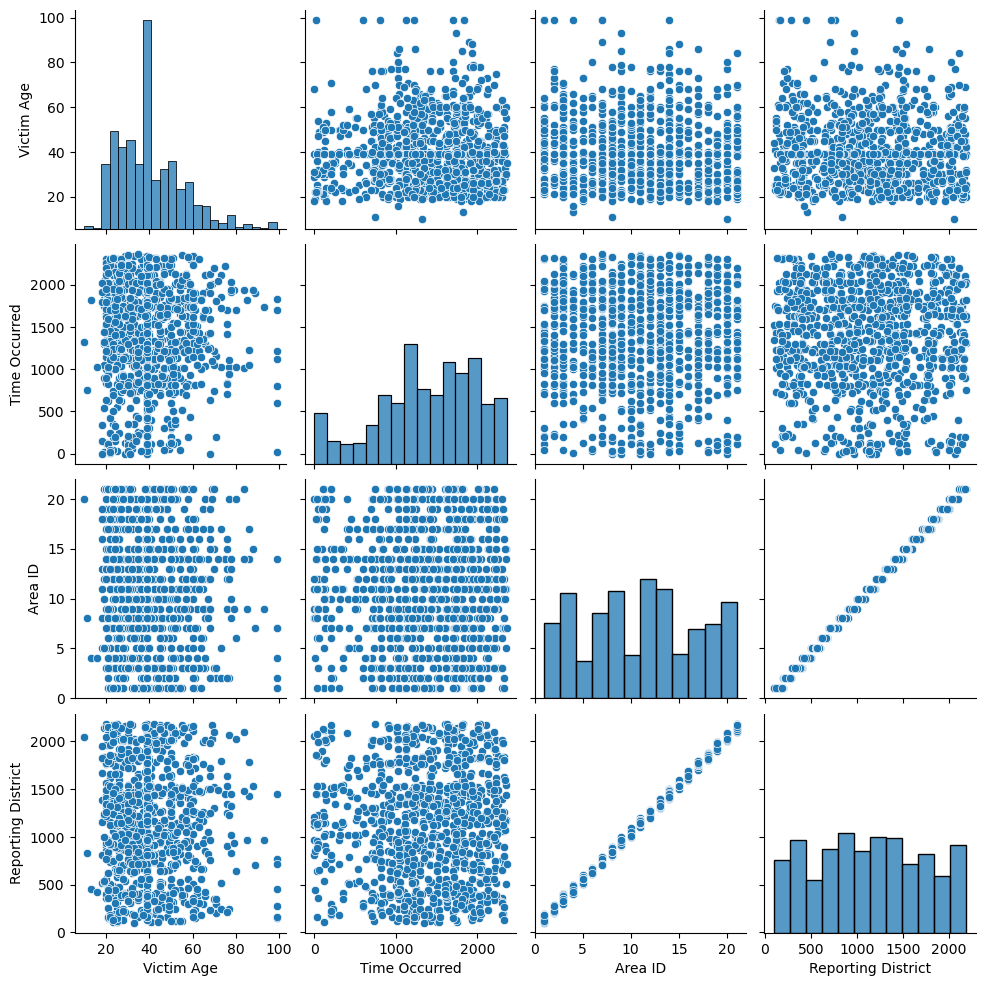

In [63]:
# 11. Pairplot (Optional sample due to large dataset)
sample_data = data[['Victim Age', 'Time Occurred', 'Area ID', 'Reporting District']].sample(1000)
sns.pairplot(sample_data)
plt.savefig("pairplot_sample.png")
plt.show()

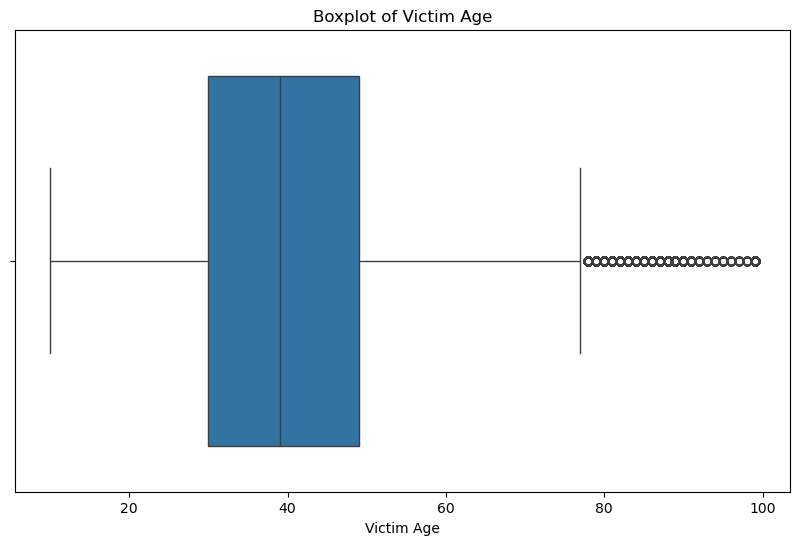

In [67]:
# 9. Outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Victim Age'])
plt.title("Boxplot of Victim Age")
plt.savefig("victim_age_boxplot.png")
plt.show()